In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [61]:
df= pd.read_csv("/content/diabetes.csv")

In [62]:
print(df.info)
print(df.head)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [63]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [64]:
df.replace(0,np.nan,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [65]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [66]:
df.isnull().sum().sum()


np.int64(1263)

In [67]:
df.fillna(0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1.0


In [68]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [69]:
df.fillna(0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1.0


In [70]:
missing_values_after = df.isnull().sum()


In [71]:
df['Outcome'].value_counts()

,count
Outcome,
0.0,500
1.0,268


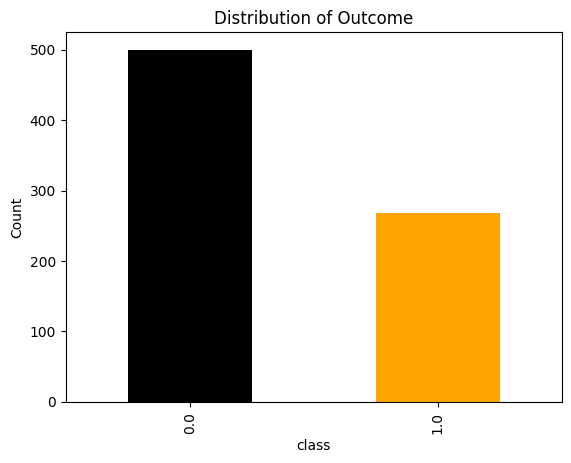

In [72]:
df['Outcome'].value_counts().plot(kind='bar', color=['black','orange' ] )
plt.title('Distribution of Outcome')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

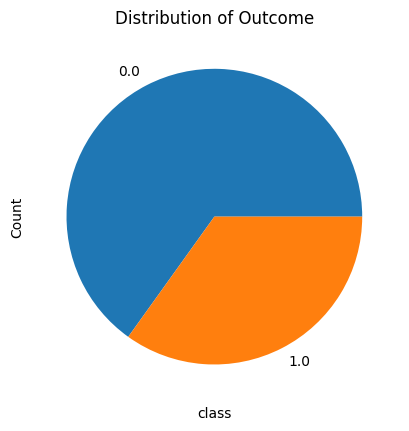

In [81]:
df['Outcome'].value_counts().plot(kind='pie', color=['black','orange' ] )
plt.title('Distribution of Outcome')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()



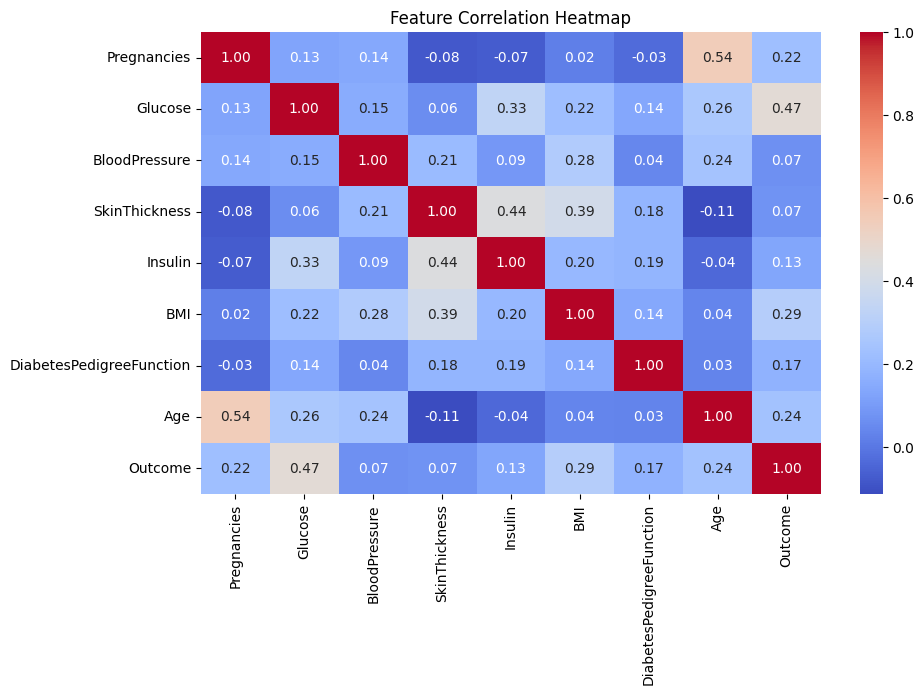

In [74]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [87]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean after scaling:", scaler.mean_)
print("Standard deviation after scaling:", scaler.scale_)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Mean after scaling: [  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542]
Standard deviation after scaling: [  3.36738361  31.95179591  19.34320163  15.94182863 115.16894926
   7.87902573   0.33111282  11.75257265]


In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
y_pred = model.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [91]:
print(f"Accuracy Score: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.7532

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

